In [165]:
library(rcompanion)

In [118]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
#data <- read.csv(sprintf('%s/mpb10km_data_clean.csv', DATA))
data <- read.csv(sprintf('%s/mpb10km_data_wo_costs.csv', DATA))
#data <- read.csv(sprintf('%s/mpb10km_data_wo_firedata.csv', DATA))
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,PctLarge,PctOld,⋯,minT,JanMin,TOctSep,Jan20,PcumOctSep,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
-124.2945,42.21193,387.5008,2.10,1,1,102.39621,51167.16,0.1931126,0.00000000,⋯,-1.701227,0.2686584,10.650637,0,3508.975,2,1.0000000,0.200000,0.0,3.5
-123.8987,40.71212,554.1549,0.80,0,1,55.00000,48183.45,0.3004344,0.11428571,⋯,-3.631704,-1.6740057,9.548764,0,3029.574,1,1.0000000,14.400000,0.0,11.0
-123.9778,41.15724,462.4003,0.46,1,1,24.51245,51675.95,0.2191781,0.06666667,⋯,-3.165836,-1.3108726,10.921748,0,2914.449,7,0.8750000,8.257143,3.0,6.0
-124.0749,41.69113,310.1873,0.70,1,1,64.69794,58227.45,0.2395833,0.07954546,⋯,-2.734460,-0.7594389,11.435045,0,3241.801,1,0.3333333,0.100000,0.0,1.0
-123.6292,39.83341,636.2545,0.70,1,1,78.60288,47511.05,0.3593750,0.50000000,⋯,-4.173242,-2.0681493,10.979370,0,2751.259,1,1.0000000,3597.000000,34.0,72.0
-123.8913,41.34770,354.7943,0.46,1,0,84.20680,52603.24,0.1860465,0.01282051,⋯,-3.712275,-1.7491565,11.032777,0,2947.334,6,1.0000000,1.433333,0.5,1.0


In [119]:
g <- lm(log(beetleAcres) ~ ., data)
g <- update(g, .~. -summerP1)
g <- step(g, trace=0)

In [120]:
summary(g)


Call:
lm(formula = log(beetleAcres) ~ lat + etopo1 + host + forest + 
    density + PctOld + prs + GAP1 + vpd + cwd + maxAugT + summerP0 + 
    Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugMaxT + AugTmax + 
    ddAugJun + ddAugJul + JanTmin + PPT + summerP2 + TMarAug + 
    Mar20 + fallTmean + MarTmin + maxT + Tmin + summerTmean + 
    Pmean + minT + JanMin + TOctSep + Jan20 + PcumOctSep + SprsFires + 
    PctSprs + SprsAcre, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6286 -1.0291  0.1182  1.1185  7.4138 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.482e+00  3.081e+00  -1.455 0.145789    
lat          2.569e-01  6.283e-02   4.090 4.44e-05 ***
etopo1       1.862e-03  2.249e-04   8.280  < 2e-16 ***
host         6.695e-01  1.404e-01   4.767 1.96e-06 ***
forest       1.876e-01  7.136e-02   2.629 0.008619 ** 
density      1.857e-05  2.232e-06   8.319  < 2e-16 ***
PctOld       3.072e-01  1.149e-01   2.673 0.007559 ** 
prs

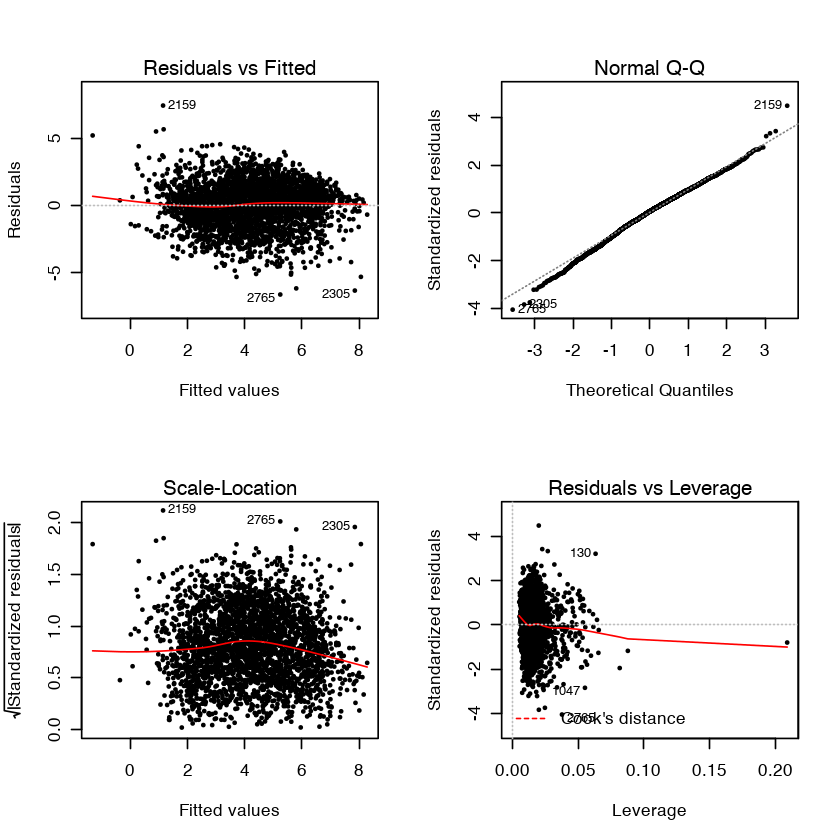

In [121]:
par(mfrow=c(2, 2))
plot(g, pch=16, cex=0.5)

In [51]:
round(cor(data),3)

,lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,PctLarge,PctOld,⋯,JanMin,TOctSep,Jan20,PcumOctSep,logSprsCPA.p1,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
lon,1.000,-0.061,0.548,0.046,-0.041,0.008,-0.182,-0.199,-0.398,0.050,⋯,-0.791,-0.459,0.683,-0.595,-0.290,-0.001,0.011,0.035,0.018,-0.067
lat,-0.061,1.000,-0.447,0.121,0.050,-0.069,-0.171,-0.111,-0.042,-0.079,⋯,-0.374,-0.350,0.326,0.020,-0.075,-0.090,0.191,0.064,0.138,0.092
etopo1,0.548,-0.447,1.000,0.230,-0.037,0.147,0.201,-0.006,-0.172,0.282,⋯,-0.484,-0.591,0.242,-0.323,-0.066,-0.042,-0.329,-0.044,0.100,0.010
beetleAcres,0.046,0.121,0.230,1.000,0.093,0.127,0.121,0.125,-0.128,0.149,⋯,-0.182,-0.239,0.144,-0.026,0.078,-0.009,-0.136,-0.017,0.178,0.087
host,-0.041,0.050,-0.037,0.093,1.000,0.129,0.045,0.119,-0.049,0.056,⋯,0.027,-0.020,0.024,0.112,0.041,-0.041,-0.127,0.017,0.068,0.063
forest,0.008,-0.069,0.147,0.127,0.129,1.000,0.082,0.327,-0.008,0.073,⋯,0.045,-0.077,-0.074,0.134,0.099,0.011,-0.188,-0.028,0.059,0.043
mStdAge,-0.182,-0.171,0.201,0.121,0.045,0.082,1.000,0.158,0.214,0.399,⋯,0.137,-0.060,-0.146,0.281,0.076,-0.011,-0.187,-0.054,0.118,0.098
density,-0.199,-0.111,-0.006,0.125,0.119,0.327,0.158,1.000,0.027,0.018,⋯,0.253,0.102,-0.198,0.366,0.218,0.073,-0.129,0.028,0.089,0.110
PctLarge,-0.398,-0.042,-0.172,-0.128,-0.049,-0.008,0.214,0.027,1.000,0.222,⋯,0.330,0.187,-0.357,0.275,0.050,0.066,-0.033,-0.036,-0.033,-0.042
PctOld,0.050,-0.079,0.282,0.149,0.056,0.073,0.399,0.018,0.222,1.000,⋯,-0.125,-0.181,0.058,-0.016,0.008,-0.024,-0.193,-0.035,0.072,0.020


In [52]:
x <- model.matrix(g)[,-1]

In [53]:
e <- eigen(t(x) %*% x)

In [54]:
e$val

[1]  2.973315e+13  3.254246e+11  7.610530e+09  3.921894e+09  6.982359e+08
 [6]  8.852111e+07  6.964553e+07  9.768181e+06  1.631934e+06  1.171584e+06
[11]  4.691477e+05  4.018512e+05  2.073104e+05  1.906948e+05  8.414731e+04
[16]  6.592585e+04  3.012363e+04  2.122812e+04  1.096851e+04  8.927299e+03
[21]  3.380767e+03  2.655308e+03  2.404246e+03  1.716811e+03  1.126360e+03
[26]  8.818013e+02  7.005158e+02  5.857127e+02  3.565197e+02  2.746900e+02
[31]  2.192753e+02  1.898317e+02  1.672240e+02  1.472949e+02  1.353012e+02
[36]  1.060752e+02  7.742183e+01  7.206542e+01  5.799608e+01  5.186152e+01
[41]  4.974361e+01  4.541287e+01  3.466876e+01  3.183176e+01  2.326665e+01
[46]  1.836417e+01  1.117203e+01  9.454574e+00  9.370655e+00  8.086284e+00
[51]  4.875236e+00  3.175113e+00  1.371391e+00  9.370355e-01  8.703178e-02
[56]  7.774705e-04 -3.745881e-08

In [55]:
sqrt(e$val[1]/e$val)

Warning message in sqrt(e$val[1]/e$val):
“NaNs produced”

[1] 1.000000e+00 9.558621e+00 6.250475e+01 8.707080e+01 2.063571e+02
 [6] 5.795582e+02 6.533920e+02 1.744671e+03 4.268440e+03 5.037717e+03
[11] 7.960964e+03 8.601770e+03 1.197595e+04 1.248680e+04 1.879751e+04
[16] 2.123697e+04 3.141715e+04 3.742525e+04 5.206510e+04 5.771124e+04
[21] 9.378056e+04 1.058188e+05 1.112067e+05 1.316010e+05 1.624732e+05
[26] 1.836264e+05 2.060210e+05 2.253088e+05 2.887877e+05 3.290024e+05
[31] 3.682355e+05 3.957638e+05 4.216685e+05 4.492898e+05 4.687806e+05
[36] 5.294361e+05 6.197103e+05 6.423282e+05 7.160133e+05 7.571777e+05
[41] 7.731287e+05 8.091536e+05 9.260860e+05 9.664739e+05 1.130456e+06
[46] 1.272433e+06 1.631377e+06 1.773370e+06 1.781294e+06 1.917547e+06
[51] 2.469577e+06 3.060137e+06 4.656287e+06 5.633035e+06 1.848338e+07
[56] 1.955593e+08          NaN

In [56]:
summary(lm(x[,1] ~ x[,-1]))$r.squared

[1] 0.9808474

In [57]:
1/(1-0.980847430219114)

[1] 52.21231

In [61]:
#install.packages('faraway')
library(faraway)

In [62]:
vif(x)

lon           lat        etopo1          host        forest 
 5.221231e+01  8.432728e+01  2.583581e+01  1.186132e+00  1.349963e+00 
      mStdAge       density      PctLarge        PctOld           vcc 
 1.645710e+00  1.638467e+00  1.621248e+00  1.470823e+00  1.337892e+00 
         mfri           prs           pms           pls          GAP1 
 2.756856e+00  5.459148e+00  2.839796e+00  4.633592e+00  1.716373e+00 
         GAP2          GAP3           vpd           cwd       maxAugT 
 1.254360e+00  1.666771e+00  7.909532e+01  6.123743e+01  1.199937e+01 
     summerP0         Tmean            mi          Tvar            wd 
          Inf  4.561141e+06  2.531881e+02  5.436640e+03  2.373945e+02 
     AugTmean       OctTmin       AugMaxT       AugTmax           Acs 
 1.400918e+03  2.225106e+02  4.291552e+02  1.186057e+02  3.640662e+01 
       MarMin      ddAugJun      ddAugJul       JanTmin           PPT 
 1.375861e+02  1.025245e+06  1.021174e+06  6.688840e+02  4.222011e+03 
     summerP2       TMarAug         Mar20     fallTmean       MarTmin 
          Inf  1.190596e+04  1.399088e+01  5.377329e+03  3.805489e+02 
         maxT          Tmin     winterMin   summerTmean         Pmean 
 4.222608e+02  1.456963e+03  7.282407e+03  6.755112e+03  7.622072e+04 
     summerP1          minT        JanMin       TOctSep         Jan20 
          Inf  7.515842e+03  4.631749e+02  4.653635e+06  6.113575e+01 
   PcumOctSep logSprsCPA.p1     SprsFires       PctSprs      SprsAcre 
 1.027270e+05  1.296379e+00  1.567714e+00  2.206056e+00  1.374640e+00 
     SprsDays       OutDays 
 2.333105e+00  2.316141e+00

In [64]:
colnames(data)

[1] "lon"           "lat"           "etopo1"        "beetleAcres"  
 [5] "host"          "forest"        "mStdAge"       "density"      
 [9] "PctLarge"      "PctOld"        "vcc"           "mfri"         
[13] "prs"           "pms"           "pls"           "GAP1"         
[17] "GAP2"          "GAP3"          "vpd"           "cwd"          
[21] "maxAugT"       "summerP0"      "Tmean"         "mi"           
[25] "Tvar"          "wd"            "AugTmean"      "OctTmin"      
[29] "AugMaxT"       "AugTmax"       "Acs"           "MarMin"       
[33] "ddAugJun"      "ddAugJul"      "JanTmin"       "PPT"          
[37] "summerP2"      "TMarAug"       "Mar20"         "fallTmean"    
[41] "MarTmin"       "maxT"          "Tmin"          "winterMin"    
[45] "summerTmean"   "Pmean"         "summerP1"      "minT"         
[49] "JanMin"        "TOctSep"       "Jan20"         "PcumOctSep"   
[53] "logSprsCPA.p1" "SprsFires"     "PctSprs"       "SprsAcre"     
[57] "SprsDays"      "OutDays"

In [88]:
cor.test(data$SprsDays, data$OutDays)


	Pearson's product-moment correlation

data:  data$SprsDays and data$OutDays
t = 27.772, df = 826, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6579027 0.7285270
sample estimates:
      cor 
0.6948867 


In [122]:
g <- lm(log(beetleAcres) ~ host+forest+mStdAge+density+PctLarge+PctOld+vcc+mfri+prs+pms+pls+
        GAP1+GAP2+GAP3+vpd+cwd+maxAugT+summerP0+Tmean+Tvar+wd+AugTmax+Acs+JanTmin+PPT+Mar20+
        SprsFires+PctSprs+SprsAcre+SprsDays+OutDays,data)

In [123]:
summary(g)


Call:
lm(formula = log(beetleAcres) ~ host + forest + mStdAge + density + 
    PctLarge + PctOld + vcc + mfri + prs + pms + pls + GAP1 + 
    GAP2 + GAP3 + vpd + cwd + maxAugT + summerP0 + Tmean + Tvar + 
    wd + AugTmax + Acs + JanTmin + PPT + Mar20 + SprsFires + 
    PctSprs + SprsAcre + SprsDays + OutDays, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9022 -1.3391  0.0168  1.3865  6.9904 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.411e+01  1.089e+00  12.957  < 2e-16 ***
host         7.608e-01  1.558e-01   4.883 1.11e-06 ***
forest       2.707e-01  7.896e-02   3.429 0.000615 ***
mStdAge      5.340e-04  8.153e-04   0.655 0.512534    
density      1.710e-05  2.459e-06   6.953 4.43e-12 ***
PctLarge    -2.127e-01  2.032e-01  -1.047 0.295260    
PctOld       4.506e-01  1.389e-01   3.245 0.001190 ** 
vcc          4.657e-02  3.888e-02   1.198 0.231081    
mfri         1.769e-02  8.986e-03   1.969 0.049083 *  
prs         -2.

In [124]:
df <- data
df$beetleAcres <- log(df$beetleAcres)
scdf <- data.frame(scale(df))

In [125]:
g <- lm(beetleAcres ~ host + forest + mStdAge + density + 
    PctLarge + PctOld + vcc + mfri + prs + pms + pls + GAP1 + 
    GAP2 + GAP3 + vpd + cwd + maxAugT + summerP0 + Tmean + Tvar + 
    wd + AugTmax + Acs + JanTmin + PPT + Mar20  + 
    SprsFires + PctSprs + SprsAcre + SprsDays + OutDays, scdf)

In [126]:
summary(g)


Call:
lm(formula = beetleAcres ~ host + forest + mStdAge + density + 
    PctLarge + PctOld + vcc + mfri + prs + pms + pls + GAP1 + 
    GAP2 + GAP3 + vpd + cwd + maxAugT + summerP0 + Tmean + Tvar + 
    wd + AugTmax + Acs + JanTmin + PPT + Mar20 + SprsFires + 
    PctSprs + SprsAcre + SprsDays + OutDays, data = scdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.59921 -0.58973  0.00739  0.61059  3.07846 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.007e-15  1.556e-02   0.000 1.000000    
host         7.911e-02  1.620e-02   4.883 1.11e-06 ***
forest       5.927e-02  1.728e-02   3.429 0.000615 ***
mStdAge      1.243e-02  1.898e-02   0.655 0.512534    
density      1.319e-01  1.897e-02   6.953 4.43e-12 ***
PctLarge    -1.975e-02  1.887e-02  -1.047 0.295260    
PctOld       5.882e-02  1.813e-02   3.245 0.001190 ** 
vcc          1.999e-02  1.668e-02   1.198 0.231081    
mfri         4.638e-02  2.356e-02   1.969 0.049083 *  
prs       

In [127]:
g <- step(g, trace=0)

In [132]:
summary(g, cor=T)


Call:
lm(formula = beetleAcres ~ host + forest + density + PctOld + 
    mfri + prs + pms + pls + vpd + cwd + maxAugT + summerP0 + 
    Tmean + wd + AugTmax + Acs + JanTmin + Mar20 + SprsFires + 
    PctSprs + SprsAcre, data = scdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64289 -0.59412  0.01612  0.60155  3.01617 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.240e-15  1.556e-02   0.000 1.000000    
host         8.053e-02  1.613e-02   4.991 6.37e-07 ***
forest       6.047e-02  1.724e-02   3.507 0.000460 ***
density      1.298e-01  1.866e-02   6.955 4.37e-12 ***
PctOld       5.638e-02  1.651e-02   3.416 0.000645 ***
mfri         4.940e-02  2.291e-02   2.156 0.031170 *  
prs         -9.185e-02  3.858e-02  -2.381 0.017339 *  
pms         -5.318e-02  2.831e-02  -1.879 0.060400 .  
pls         -5.943e-02  3.536e-02  -1.680 0.092978 .  
vpd         -4.469e-01  5.406e-02  -8.267  < 2e-16 ***
cwd          1.130e-01  4.886e-02   2.312 

In [133]:
sort(abs(g$coefficients))

(Intercept)     SprsAcre         mfri          pms       PctOld          pls 
1.239638e-15 2.739122e-02 4.939886e-02 5.318274e-02 5.638209e-02 5.942874e-02 
      forest    SprsFires         host          prs      AugTmax          cwd 
6.047463e-02 6.954203e-02 8.053150e-02 9.185474e-02 9.504788e-02 1.129741e-01 
     density      PctSprs      maxAugT        Mar20        Tmean      JanTmin 
1.297822e-01 1.585217e-01 2.129076e-01 2.828486e-01 3.074204e-01 3.116737e-01 
          wd     summerP0          Acs          vpd 
3.171292e-01 3.738735e-01 4.232086e-01 4.469415e-01

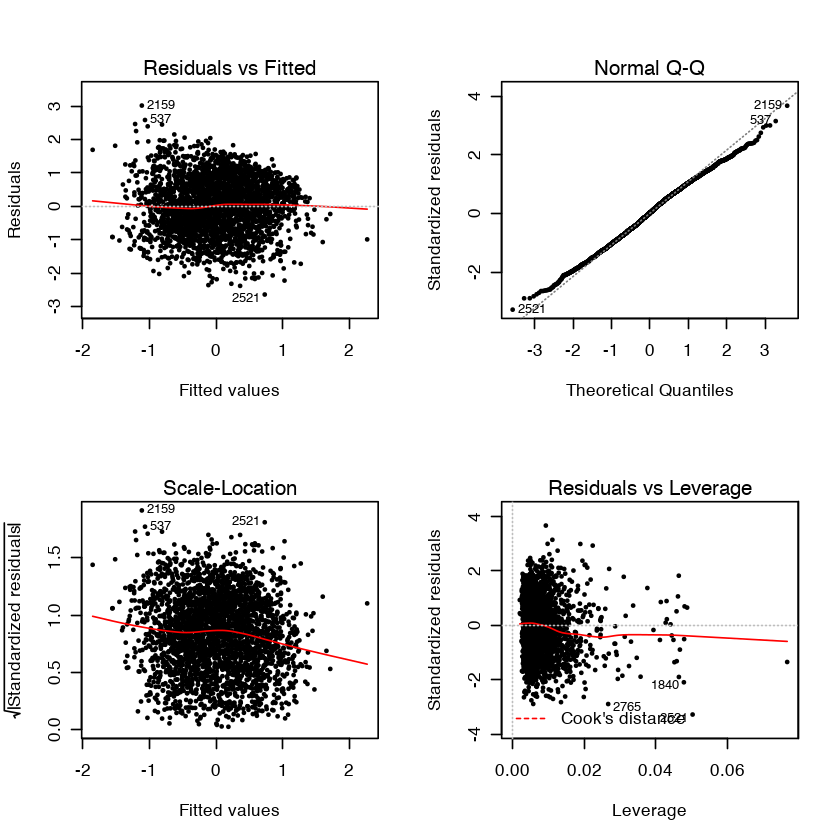

In [130]:
par(mfrow=c(2, 2))
plot(g, pch=16, cex=0.5)

In [131]:
cor.test(data$PctOld, data$mStdAge)


	Pearson's product-moment correlation

data:  data$PctOld and data$mStdAge
t = 22.135, df = 2817, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3530116 0.4159203
sample estimates:
      cor 
0.3849129 


In [134]:
g <- update(g, .~. -JanTmin)
summary(g)


Call:
lm(formula = beetleAcres ~ host + forest + density + PctOld + 
    mfri + prs + pms + pls + vpd + cwd + maxAugT + summerP0 + 
    Tmean + wd + AugTmax + Acs + Mar20 + SprsFires + PctSprs + 
    SprsAcre, data = scdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62899 -0.58993  0.00504  0.61149  3.05293 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.407e-15  1.561e-02   0.000 1.000000    
host         8.189e-02  1.618e-02   5.060 4.46e-07 ***
forest       5.535e-02  1.726e-02   3.208 0.001354 ** 
density      1.387e-01  1.861e-02   7.454 1.20e-13 ***
PctOld       5.740e-02  1.656e-02   3.467 0.000534 ***
mfri         4.717e-02  2.298e-02   2.053 0.040180 *  
prs         -8.966e-02  3.870e-02  -2.317 0.020590 *  
pms         -5.149e-02  2.840e-02  -1.813 0.069911 .  
pls         -6.467e-02  3.546e-02  -1.824 0.068257 .  
vpd         -4.313e-01  5.412e-02  -7.971 2.27e-15 ***
cwd         -3.469e-03  4.102e-02  -0.085 0.932609  

In [135]:
sort(abs(g$coefficients))

(Intercept)          cwd     SprsAcre         mfri        Tmean          pms 
1.407302e-15 3.468817e-03 2.629047e-02 4.717456e-02 4.717707e-02 5.148943e-02 
     AugTmax       forest       PctOld          pls    SprsFires         host 
5.206146e-02 5.535394e-02 5.740270e-02 6.467406e-02 6.549288e-02 8.189031e-02 
         prs      density      PctSprs      maxAugT        Mar20           wd 
8.965890e-02 1.386935e-01 1.622090e-01 2.219069e-01 3.013037e-01 3.077163e-01 
         Acs          vpd     summerP0 
4.134380e-01 4.313444e-01 4.775506e-01

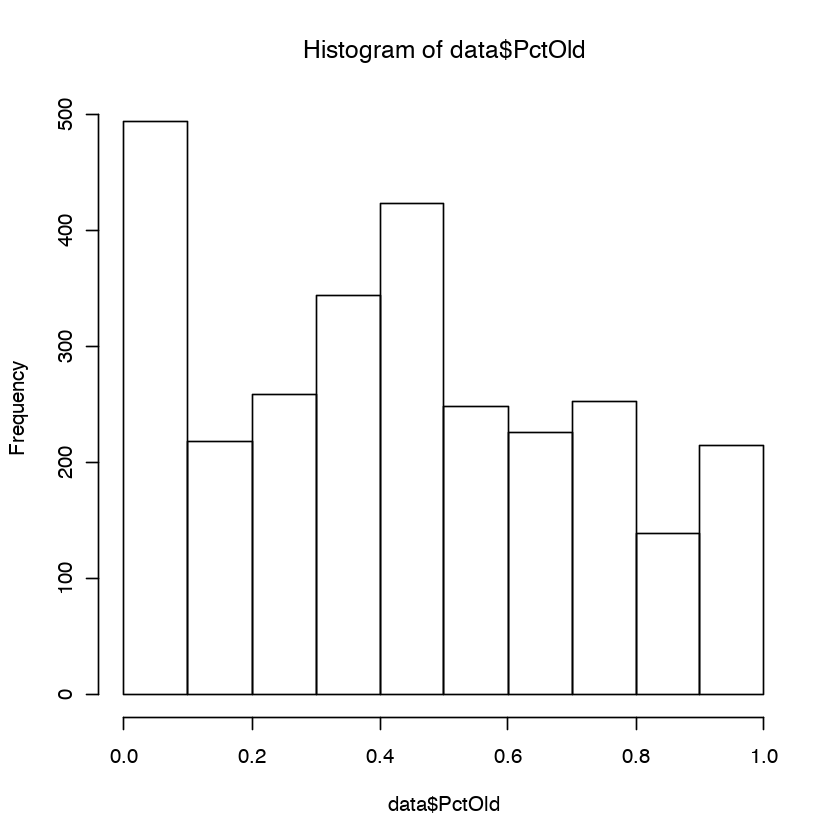

In [155]:
hist(data$PctOld)

In [184]:
m1 <- lm(log(beetleAcres) ~ maxAugT, data)
summary(m1)


Call:
lm(formula = log(beetleAcres) ~ maxAugT, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7510 -1.5879  0.0925  1.7383  5.0585 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.50745    0.43130   24.36   <2e-16 ***
maxAugT     -0.21685    0.01485  -14.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.19 on 2817 degrees of freedom
Multiple R-squared:  0.07039,	Adjusted R-squared:  0.07006 
F-statistic: 213.3 on 1 and 2817 DF,  p-value: < 2.2e-16


In [177]:
cor.test(log(data$beetleAcres), data$SprsFires)


	Pearson's product-moment correlation

data:  log(data$beetleAcres) and data$SprsFires
t = -4.9734, df = 2817, p-value = 6.974e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.12976620 -0.05657264
sample estimates:
        cor 
-0.09329547 


In [179]:
m2 <- glm(log(beetleAcres) ~ I(-1 * SprsFires^(-0.2)), data, family='gaussian')
summary(m2)


Call:
glm(formula = log(beetleAcres) ~ I(-1 * SprsFires^(-0.2)), family = "gaussian", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.8091  -1.7701   0.1005   1.7821   4.9689  

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.1402     0.2080   15.10  < 2e-16 ***
I(-1 * SprsFires^(-0.2))  -1.3663     0.2535   -5.39 7.64e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.105525)

    Null deviance: 14531  on 2818  degrees of freedom
Residual deviance: 14382  on 2817  degrees of freedom
AIC: 12600

Number of Fisher Scoring iterations: 2


In [174]:
m2 <- lm(log(beetleAcres) ~ SprsFires, data)
summary(m2)


Call:
lm(formula = log(beetleAcres) ~ SprsFires, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-6.639 -1.742  0.109  1.770  5.257 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.352421   0.048461  89.812  < 2e-16 ***
SprsFires   -0.015647   0.003146  -4.973 6.97e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.261 on 2817 degrees of freedom
Multiple R-squared:  0.008704,	Adjusted R-squared:  0.008352 
F-statistic: 24.73 on 1 and 2817 DF,  p-value: 6.974e-07


In [175]:
m2 <- lm(log(beetleAcres) ~ I(-1 * SprsFires^(-0.2)), data)
summary(m2)


Call:
lm(formula = log(beetleAcres) ~ I(-1 * SprsFires^(-0.2)), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8091 -1.7701  0.1005  1.7821  4.9689 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.1402     0.2080   15.10  < 2e-16 ***
I(-1 * SprsFires^(-0.2))  -1.3663     0.2535   -5.39 7.64e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.26 on 2817 degrees of freedom
Multiple R-squared:  0.01021,	Adjusted R-squared:  0.009855 
F-statistic: 29.05 on 1 and 2817 DF,  p-value: 7.642e-08


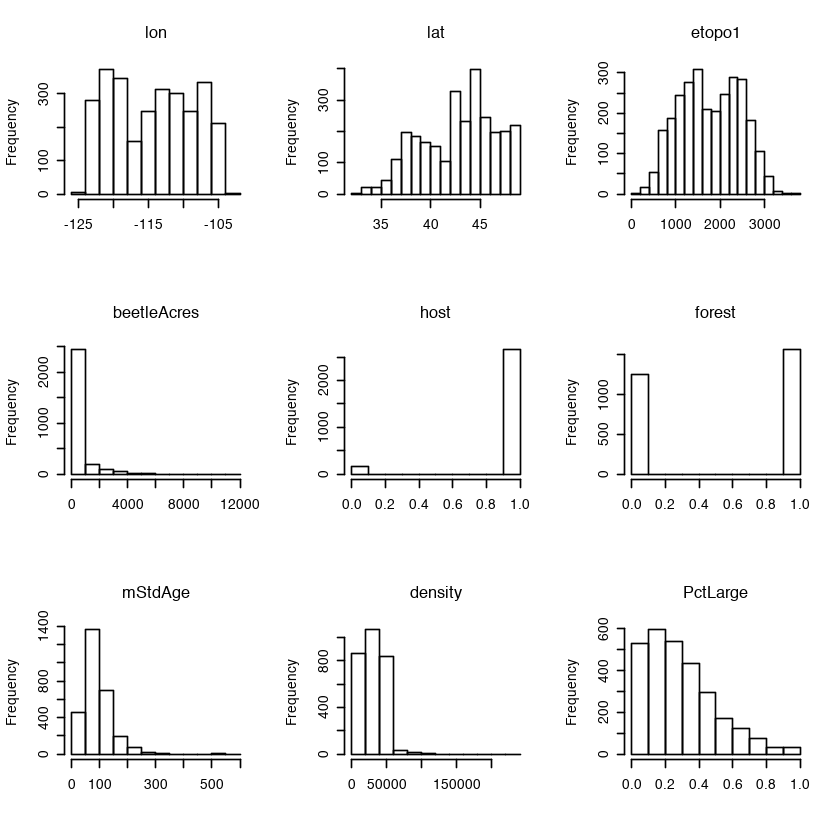

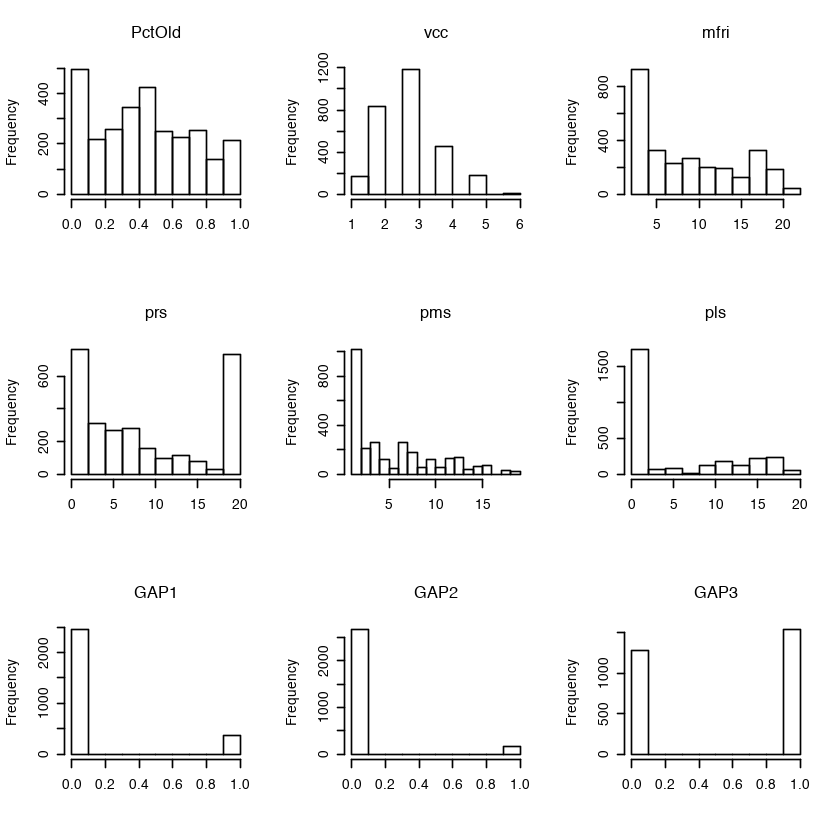

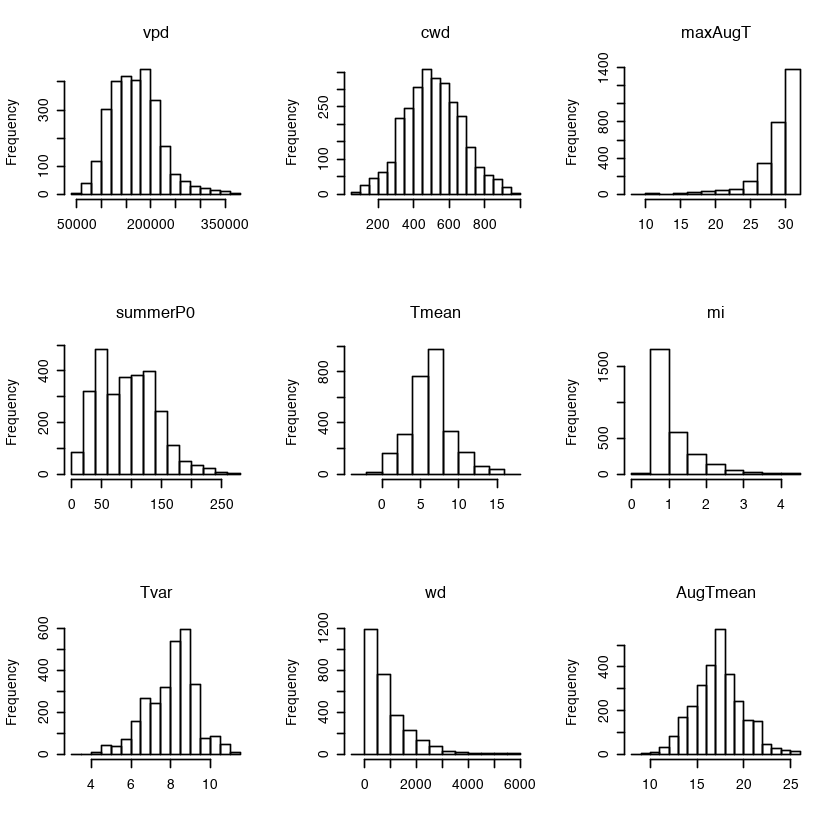

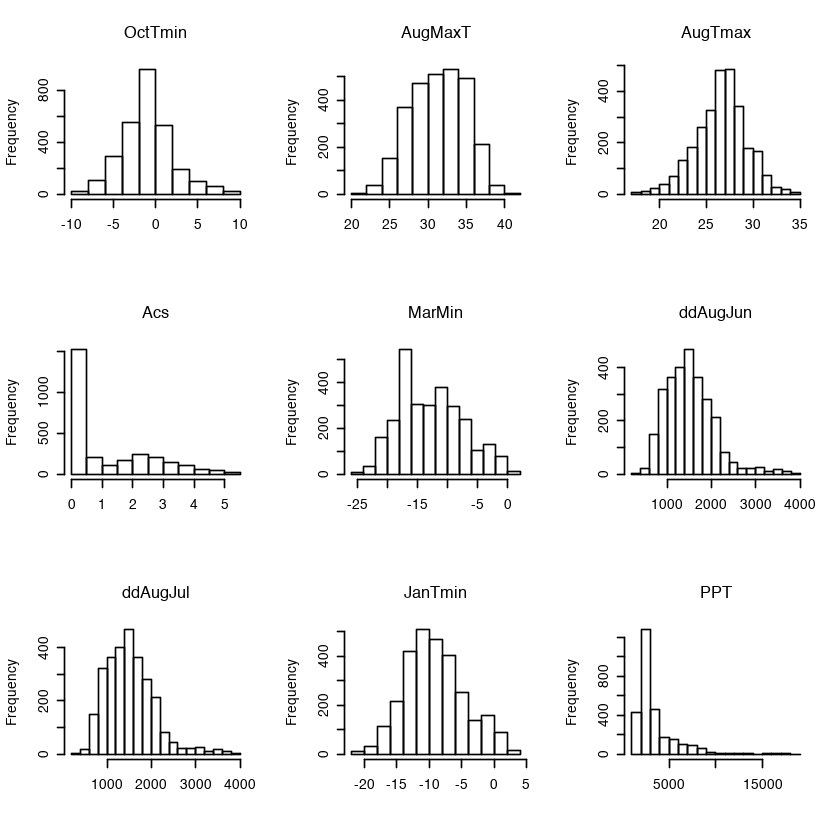

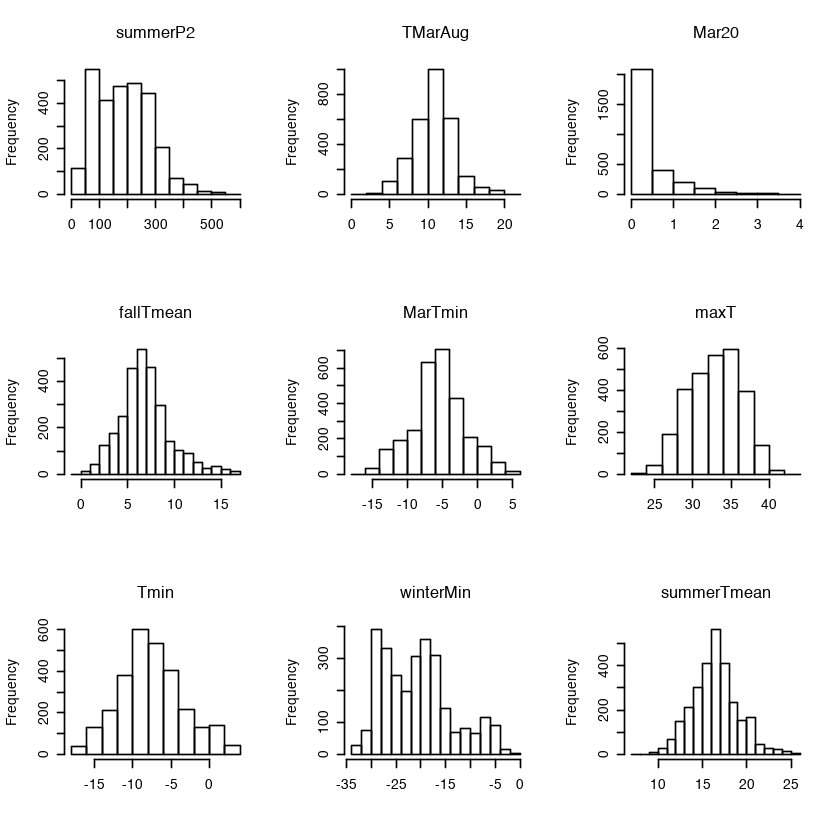

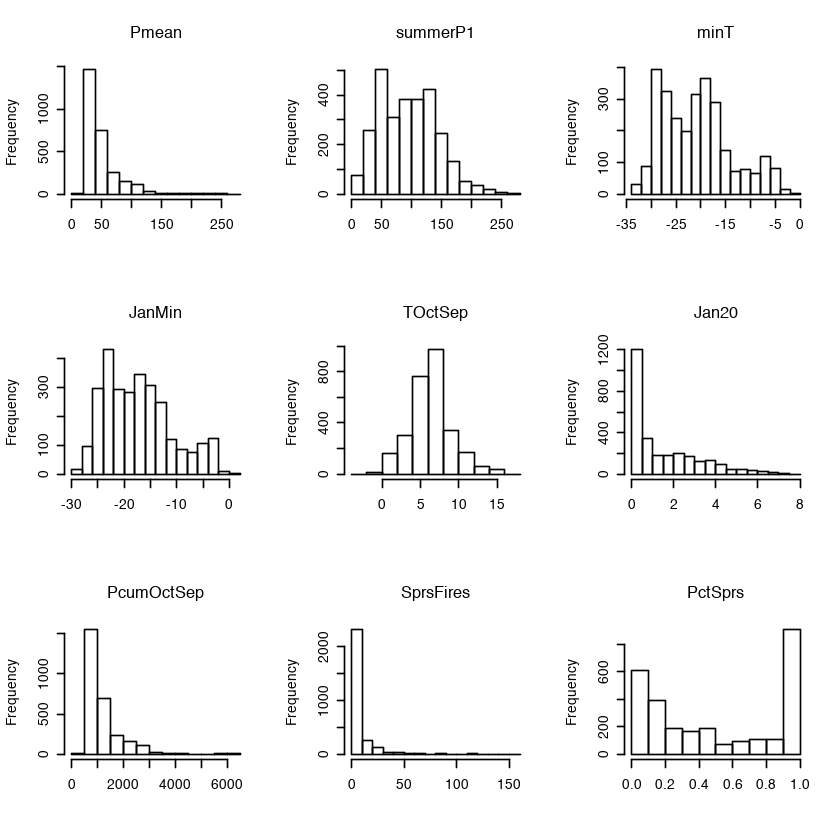

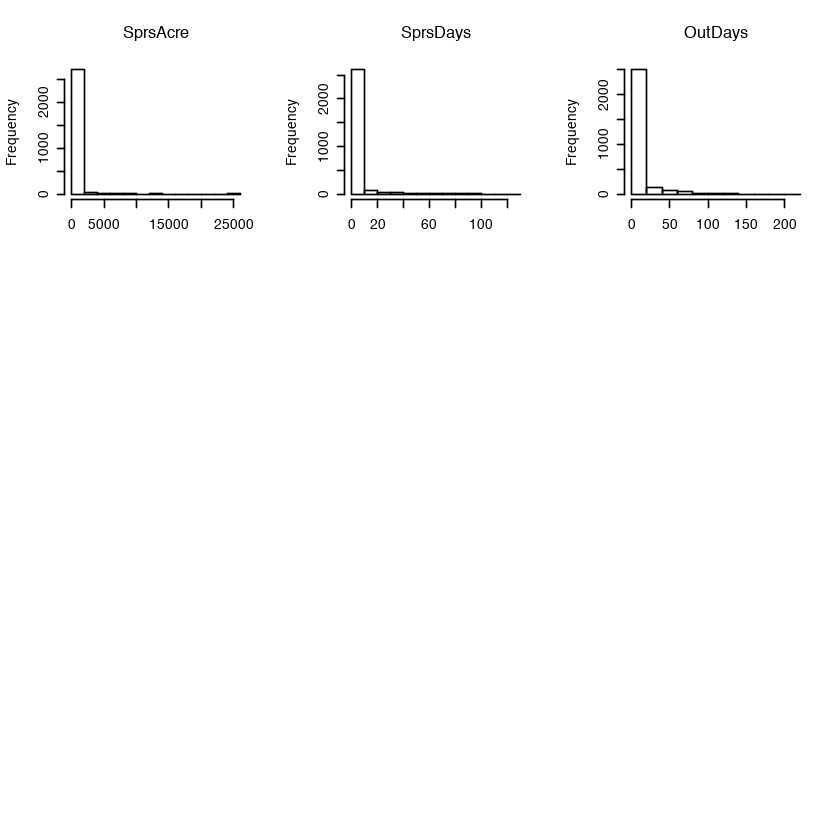

In [162]:
par(mfrow=c(3, 3))
for(v in colnames(data)){
    hist(data[,v], main=v, xlab='')   
}

In [180]:
x.tuk <- transformTukey(data$maxAugT,plotit=FALSE)


    lambda      W Shapiro.p.value
800  9.975 0.9116        1.04e-37

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



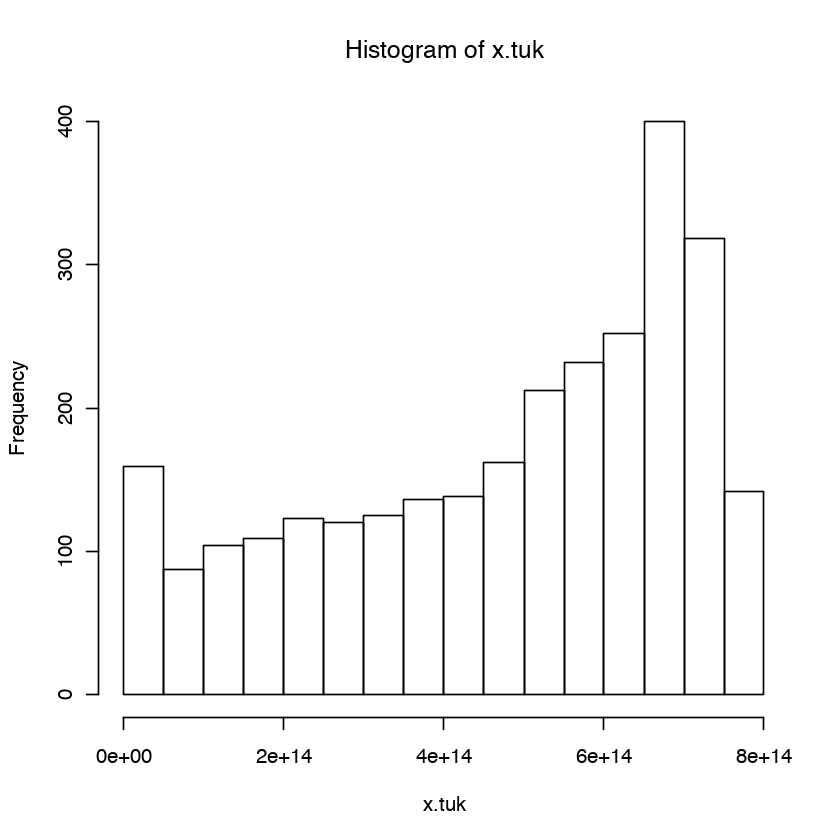

In [181]:
hist(x.tuk)

In [170]:
summary(m1)
summary(m2)


Call:
lm(formula = log(beetleAcres) ~ log(vpd), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7782 -1.6192  0.0901  1.6654  5.5188 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.6054     1.6662   20.77   <2e-16 ***
log(vpd)     -2.5314     0.1389  -18.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.148 on 2817 degrees of freedom
Multiple R-squared:  0.1055,	Adjusted R-squared:  0.1052 
F-statistic: 332.4 on 1 and 2817 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(beetleAcres) ~ I(SprsAcre^0.075), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5931 -1.7502  0.1086  1.7958  5.0493 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.4771     0.1498   29.89   <2e-16 ***
I(SprsAcre^0.075)  -0.2218     0.1328   -1.67   0.0951 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.27 on 2817 degrees of freedom
Multiple R-squared:  0.0009888,	Adjusted R-squared:  0.0006341 
F-statistic: 2.788 on 1 and 2817 DF,  p-value: 0.09508


In [147]:
summary(m1)
summary(m2)


Call:
lm(formula = beetleAcres ~ Acs, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1902 -1.7179  0.1378  1.7570  4.7571 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.79777    0.05455   69.62   <2e-16 ***
Acs          0.37697    0.03022   12.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.211 on 2817 degrees of freedom
Multiple R-squared:  0.05235,	Adjusted R-squared:  0.05202 
F-statistic: 155.6 on 1 and 2817 DF,  p-value: < 2.2e-16



Call:
lm(formula = beetleAcres ~ density, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7877 -1.7367  0.1202  1.8174  5.1103 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.939e+00  8.381e-02  46.995  < 2e-16 ***
density     1.008e-05  2.434e-06   4.141 3.56e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.264 on 2817 degrees of freedom
Multiple R-squared:  0.006051,	Adjusted R-squared:  0.005698 
F-statistic: 17.15 on 1 and 2817 DF,  p-value: 3.558e-05


In [150]:
summary(m1)
summary(m2)


Call:
lm(formula = beetleAcres ~ vpd, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8568 -1.6363  0.0962  1.6533  6.1049 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.737e+00  1.472e-01   45.75   <2e-16 ***
vpd         -1.478e-05  8.373e-07  -17.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.155 on 2817 degrees of freedom
Multiple R-squared:  0.09965,	Adjusted R-squared:  0.09933 
F-statistic: 311.8 on 1 and 2817 DF,  p-value: < 2.2e-16



Call:
lm(formula = beetleAcres ~ PctOld, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9482 -1.7267  0.1242  1.7774  5.4064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.73811    0.07574  49.354  < 2e-16 ***
PctOld       1.13440    0.14273   7.948 2.72e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.246 on 2817 degrees of freedom
Multiple R-squared:  0.02193,	Adjusted R-squared:  0.02158 
F-statistic: 63.17 on 1 and 2817 DF,  p-value: 2.722e-15


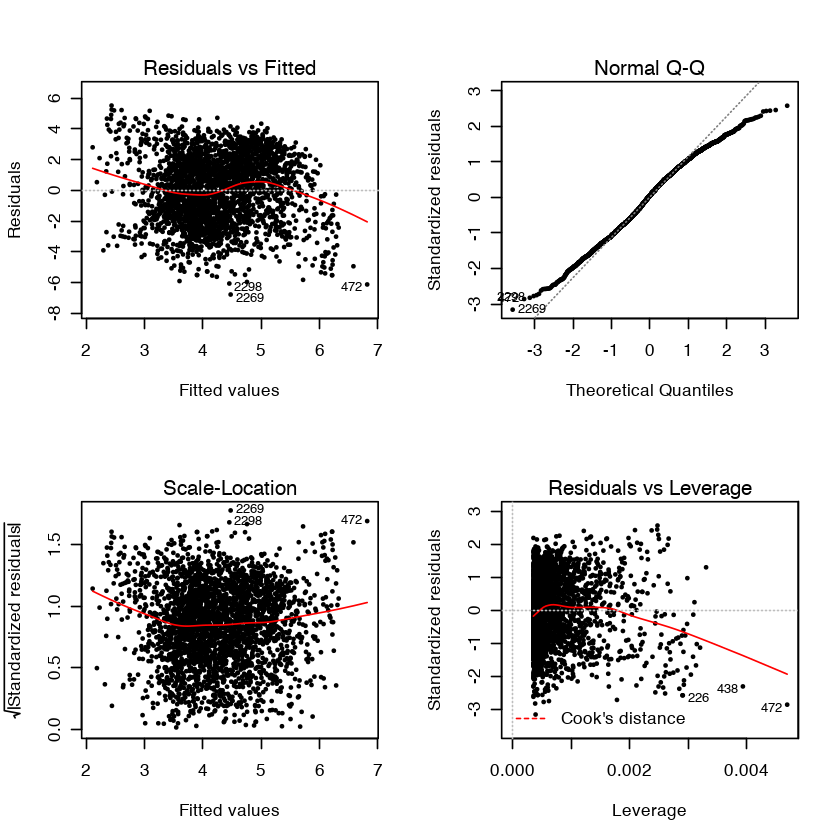

In [159]:
par(mfrow=c(2, 2))
plot(m1, pch=16, cex=0.5)

In [158]:
summary(m1)
summary(m2)


Call:
lm(formula = log(beetleAcres) ~ log(vpd), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7782 -1.6192  0.0901  1.6654  5.5188 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.6054     1.6662   20.77   <2e-16 ***
log(vpd)     -2.5314     0.1389  -18.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.148 on 2817 degrees of freedom
Multiple R-squared:  0.1055,	Adjusted R-squared:  0.1052 
F-statistic: 332.4 on 1 and 2817 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(beetleAcres) ~ PctOld, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9482 -1.7267  0.1242  1.7774  5.4064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.73811    0.07574  49.354  < 2e-16 ***
PctOld       1.13440    0.14273   7.948 2.72e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.246 on 2817 degrees of freedom
Multiple R-squared:  0.02193,	Adjusted R-squared:  0.02158 
F-statistic: 63.17 on 1 and 2817 DF,  p-value: 2.722e-15
